In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("London.csv")
pd.options.display.float_format = '{:20,.2f}'.format


### Quick look at the dataset info

In [3]:
df.head()

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3480 non-null   int64 
 1   Property Name      3480 non-null   object
 2   Price              3480 non-null   int64 
 3   House Type         3480 non-null   object
 4   Area in sq ft      3480 non-null   int64 
 5   No. of Bedrooms    3480 non-null   int64 
 6   No. of Bathrooms   3480 non-null   int64 
 7   No. of Receptions  3480 non-null   int64 
 8   Location           2518 non-null   object
 9   City/County        3480 non-null   object
 10  Postal Code        3480 non-null   object
dtypes: int64(6), object(5)
memory usage: 299.2+ KB


In [5]:
df.describe()

,Unnamed: 0,Price,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions
count,"3,480.00","3,480.00","3,480.00","3,480.00","3,480.00","3,480.00"
mean,"1,739.50","1,864,172.54","1,712.97",3.10,3.10,3.10
std,"1,004.73","2,267,282.96","1,364.26",1.52,1.52,1.52
min,0.00,"180,000.00",274.00,0.00,0.00,0.00
25%,869.75,"750,000.00",834.00,2.00,2.00,2.00
50%,"1,739.50","1,220,000.00","1,310.00",3.00,3.00,3.00
75%,"2,609.25","2,150,000.00","2,157.25",4.00,4.00,4.00
max,"3,479.00","39,750,000.00","15,405.00",10.00,10.00,10.00


## Remove Bathrooms and Receptions
The number of bathrooms and receptions is a copy of the number of bedrooms, we are dropping them

In [6]:
df = df.drop('No. of Bathrooms',1)
df = df.drop('No. of Receptions',1)
df.head()

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,Putney,London,SW15 1PL


In [7]:
df['Location'].value_counts()

Putney              96
Barnes              71
Wandsworth          70
Wimbledon           68
Esher               64
                    ..
Ranelagh Gardens     1
Swiss Cottage        1
Fernshaw Road        1
 Waltham Abbey       1
Lafone Street        1
Name: Location, Length: 656, dtype: int64

In [8]:
df['City/County'].value_counts().head()

London        2972
Surrey         262
Middlesex       78
Essex           62
Twickenham      12
Name: City/County, dtype: int64

### Dropping Location City/County columns
The Location and City/County columns are not consistent (sometimes postcode is reported and things like that)
Plus the location information is going to be provided by the postcode

In [9]:
df = df.drop('City/County',1)

In [10]:
df = df.drop('Location',1)

### Dropping Property Name 
It doesn't contribute to the price prediction

In [11]:
df = df.drop('Property Name',1)

In [12]:
df.head()

,Unnamed: 0,Price,House Type,Area in sq ft,No. of Bedrooms,Postal Code
0,0,1675000,House,2716,5,SW19 8NY
1,1,650000,Flat / Apartment,814,2,EC1V 3PA
2,2,735000,Flat / Apartment,761,2,SW15 1QL
3,3,1765000,House,1986,4,SW15 1LP
4,4,675000,Flat / Apartment,700,2,SW15 1PL


In [13]:
df.describe()

,Unnamed: 0,Price,Area in sq ft,No. of Bedrooms
count,"3,480.00","3,480.00","3,480.00","3,480.00"
mean,"1,739.50","1,864,172.54","1,712.97",3.10
std,"1,004.73","2,267,282.96","1,364.26",1.52
min,0.00,"180,000.00",274.00,0.00
25%,869.75,"750,000.00",834.00,2.00
50%,"1,739.50","1,220,000.00","1,310.00",3.00
75%,"2,609.25","2,150,000.00","2,157.25",4.00
max,"3,479.00","39,750,000.00","15,405.00",10.00


### Modifying postcode 
The last two chars of the postcode represent the unit and it is too granular. We are going to loose them to represent the subdistrict only

In [14]:
df = df[df['Postal Code'].str.contains(" ")]

In [15]:
df = df.drop('Unnamed: 0',1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3478 entries, 0 to 3479
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Price            3478 non-null   int64 
 1   House Type       3478 non-null   object
 2   Area in sq ft    3478 non-null   int64 
 3   No. of Bedrooms  3478 non-null   int64 
 4   Postal Code      3478 non-null   object
dtypes: int64(3), object(2)
memory usage: 163.0+ KB


array([[<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Area in sq ft'}>],
       [<AxesSubplot:title={'center':'No. of Bedrooms'}>, <AxesSubplot:>]],
      dtype=object)

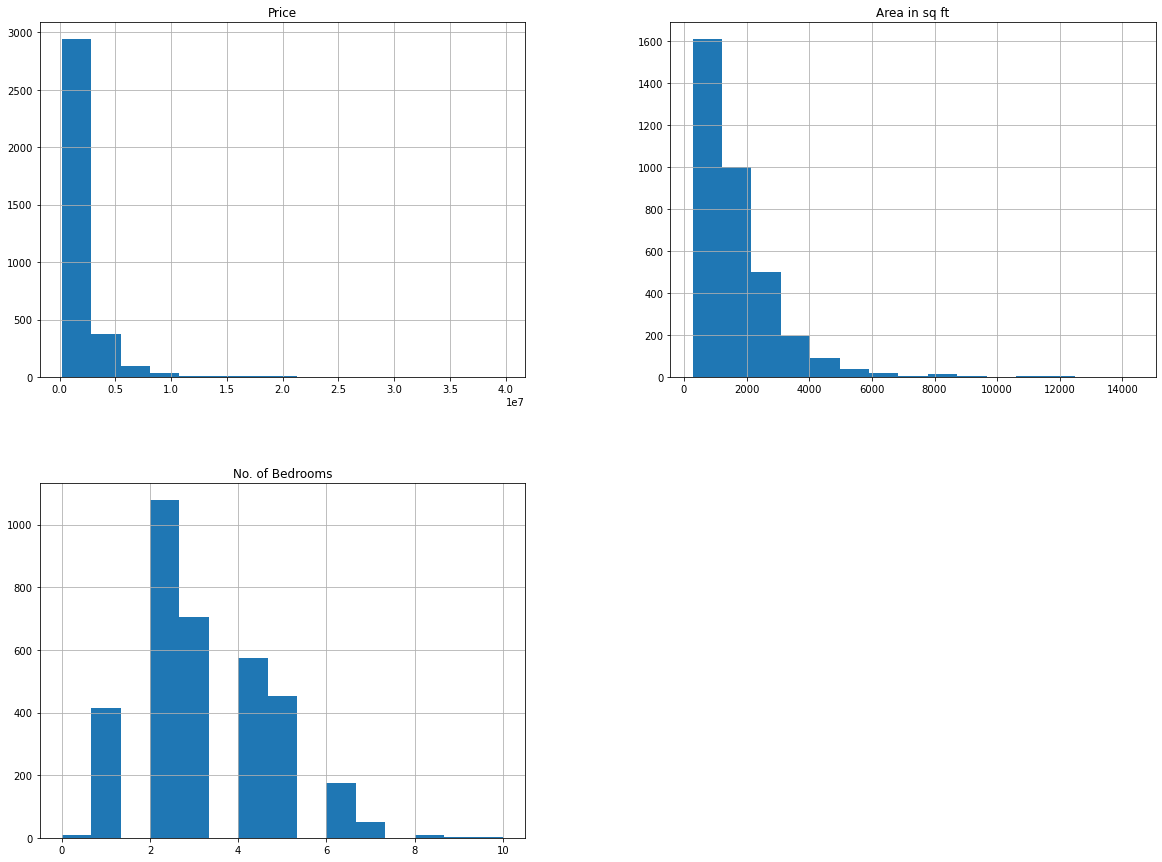

In [16]:
df.hist(bins=15,figsize=(20,15))

<AxesSubplot:>

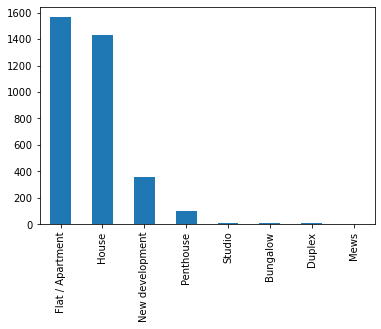

In [17]:
df['House Type'].value_counts().plot.bar()

In [18]:
df.corr()

,Price,Area in sq ft,No. of Bedrooms
Price,1.00,0.66,0.43
Area in sq ft,0.66,1.00,0.78
No. of Bedrooms,0.43,0.78,1.00


In [19]:
df['Postal Code Norm'] = df['Postal Code'].transform(lambda x: x[:-2].replace(" ",''))

In [21]:
df['House Type'] = pd.Categorical(df['House Type'])

In [22]:
df["Postal Code Norm"] = pd.Categorical(df['Postal Code Norm'])

In [34]:
df['Postcode cat'] = df["Postal Code Norm"].cat.codes
df['Type cat'] = df['House Type'].cat.codes

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3478 entries, 0 to 3479
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             3478 non-null   int64   
 1   House Type        3478 non-null   category
 2   Area in sq ft     3478 non-null   int64   
 3   No. of Bedrooms   3478 non-null   int64   
 4   Postal Code       3478 non-null   object  
 5   Postal Code Norm  3478 non-null   category
 6   Postcode cat      3478 non-null   int16   
dtypes: category(2), int16(1), int64(3), object(1)
memory usage: 172.9+ KB


In [36]:
df.corr()['Price']

Price                             1.00
Area in sq ft                     0.66
No. of Bedrooms                   0.43
Postcode cat                      0.18
Type cat                          0.18
Name: Price, dtype: float64

In [65]:
df['price_cat'] = pd.cut(df['Price'],bins=[0,200000,400000,800000,1200000,np.inf],labels=[1,2,3,4,5])
df['area_cat'] = pd.cut(df['Area in sq ft'],bins=[0,1000,1500,2500,4000,np.inf],labels=[1,2,3,4,5])

In [43]:
df.head()

,Price,House Type,Area in sq ft,No. of Bedrooms,Postal Code,Postal Code Norm,Postcode cat,Type cat,price_cat,area_cat
0,1675000,House,2716,5,SW19 8NY,SW198,258,3,5,5
1,650000,Flat / Apartment,814,2,EC1V 3PA,EC1V3,58,2,3,3
2,735000,Flat / Apartment,761,2,SW15 1QL,SW151,232,2,3,2
3,1765000,House,1986,4,SW15 1LP,SW151,232,3,5,5
4,675000,Flat / Apartment,700,2,SW15 1PL,SW151,232,2,3,2


In [45]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2)

In [70]:
for train,test in split.split(df,df['area_cat']):
    train_set_strat = df.iloc[train]
    test_set_strat = df.iloc[test]


In [80]:
X_train = train_set_strat[['Type cat','Postcode cat','No. of Bedrooms','Area in sq ft']]
Y_train = train_set_strat['Price']
X_test = test_set_strat[['Type cat','Postcode cat','No. of Bedrooms','Area in sq ft']]
Y_test = test_set_strat['Price']

1    251
3    177
2    144
4     87
5     37
Name: area_cat, dtype: int64

In [87]:
model = RandomForestRegressor()

In [88]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [89]:
model.score(X_test,Y_test)

0.6434598604572024

In [104]:
model.predict([[3,5,2,1200]])

array([1245800.])